# THE FINAL PROJECT!!!! 
#### (due 12/16)
## Step one: duplicate this notebook and set the sharing settings to EXECUTE!

#### For part 1 of this project, we will analyze and plot data to tell the story of Covid-19 within the US, first at the level of states (California and New York), and then at the level of counties (your county!). You will find instructions for each part below.

Name: Yasemin Sucu


Team members:

In [2]:
# Loading modules - see the help page in iLearn to see which modules you should load and how!!!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import datetime as dt 
from scipy.stats import linregress
colors = sns.color_palette('colorblind')
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

## Loading data

In [3]:
# loading data (filled in for you!):

# From Our World in Data
world_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates=['date'])
us_vax = world_vax[world_vax['location']=='United States'] #just filtering the United States data
state_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv', parse_dates=['date'])

# From the LA Times
county_vax = pd.read_csv('https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-vaccination-county-totals.csv', parse_dates=['date'])

# From the New York Times 
us_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv', parse_dates=['date'])
state_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv', parse_dates=['date'])
county_data_2020 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2020.csv', parse_dates=["date"])
county_data_2021 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2021.csv', parse_dates=["date"])
county_data_2022 = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties-2022.csv', parse_dates=["date"])
county_data = pd.concat([county_data_2020, county_data_2021, county_data_2022]) # making one big file for county data


In [ ]:
world_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates=['date'])
us_vax = world_vax[world_vax['location']=='United States'] #just filtering the United States data
us_vax.head(2)
state_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv', parse_dates=['date'])
state_vax = state_vax[state_vax['location']=='California'] #filtered down from state data to California, we didn't use the us_vax data variable we made earlier since there is no specification as states on that data set 
state_vax.head(3)
county_vax = pd.read_csv('https://raw.githubusercontent.com/datadesk/california-coronavirus-data/master/cdph-vaccination-county-totals.csv', parse_dates=['date'])
county_vax = county_vax[county_vax['county']=='San Francisco'] #filtered down to county of SF 
county_vax.head(3)

,date,county,fips,population,doses_administered,new_doses_administered,pfizer_doses,new_pfizer_doses,moderna_doses,new_moderna_doses,...,new_jj_doses,partially_vaccinated,new_partially_vaccinated,at_least_one_dose,new_at_least_one_dose,fully_vaccinated,new_fully_vaccinated,partially_vaccinated_percent,at_least_one_dose_percent,fully_vaccinated_percent
37,2022-12-12,San Francisco,75,870044.0,2520241,1643,1620727.0,960,820518.0,656,...,0,75320.0,105,830805.0,105,755485.0,26,0.086570,0.954900,0.86833
95,2022-12-11,San Francisco,75,870044.0,2518598,535,1619767.0,363,819862.0,171,...,0,75241.0,44,830700.0,44,755459.0,0,0.086480,0.954779,0.86830
153,2022-12-10,San Francisco,75,870044.0,2518063,834,1619404.0,590,819691.0,233,...,0,75197.0,57,830656.0,57,755459.0,7,0.086429,0.954729,0.86830


In [ ]:
#Vanessa's edit

world_vax = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv', parse_dates=['date'])

world_vax.head(3)
us_vax = world_vax[world_vax['location']=='United States'] #just filtering the United States data
us_vax.head(2)


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
136808,United States,USA,2020-12-13,41596.0,33777.0,8765.0,NaN,NaN,NaN,0.01,0.01,0.0,NaN,NaN,NaN,NaN
136809,United States,USA,2020-12-14,46378.0,38370.0,8916.0,NaN,4782.0,4782.0,0.01,0.01,0.0,NaN,14.0,4593.0,0.001


In [ ]:
us_data.iloc[1:4] #this both ways give you the same thing as last 3 items on the list 
us_data.tail(3)


,date,geoid,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
1056,2022-12-12,USA,54274,65645.15,19.78,185,467.56,0.14
1057,2022-12-13,USA,49288,66045.38,19.90,469,472.93,0.14
1058,2022-12-14,USA,154709,65575.77,19.76,805,451.01,0.14


## 1a) Plotting state data
*  Use `state_data.head(3)` to take a peek at the rolling average data for US states. 
* Using this data, plot the number of deaths per 100 thousand people due to Covid-19 over time in New York and California. Plot both New York and California on the same plot, in different colors (see screenshots with plotting tips on the help page)
    * Before plotting each state, you will need to make a new dataframe that is the subset of the state data that only contains entries for that state (see filtering/subsetting tips on the help page)       
    * Include a legend     
    * Label the y-axis
    * Try to make your plot look nice!

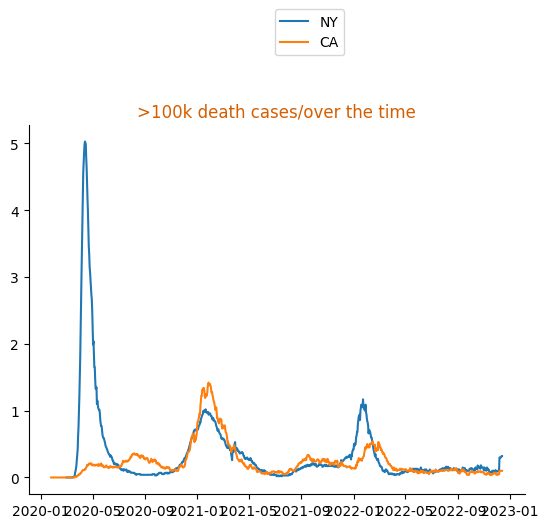

In [4]:
state_data = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv', parse_dates=['date'])
state_data.head(3)



ny_state_data = state_data[state_data['state']=='New York'] #more than 100k deaths in NY 
ny_state_data.head(3) 



ca_state_data = state_data[state_data['state']=='California'] #more than 100k deaths in CA
ca_state_data.head(3)


#now creating a plot:


#if you want a single plot
plt.plot(ny_state_data['date'], ny_state_data['deaths_avg_per_100k'], label = "NY") #, color=colors[2])
plt.plot(ca_state_data['date'], ca_state_data['deaths_avg_per_100k'], label = "CA") #, color=colors[1])
plt.title('>100k death cases/over the time', y=1, color=colors[3]) 

#how we were making a legends?

plt.legend(bbox_to_anchor =(0.65, 1.25), loc='center right')

sns.despine()



## 1b) Measuring R at three time intervals in New York and California: 
* March 14 - April 1st, 2020
* November 20th - December 20th, 2020
* February 1st - March 1st, 2021

1. Make a new column called `day_index` in the `state_data` dataframe for the day number (an integer) by subtracting the datetime for the start of 2020 and then using .dt.days on the result (see help page for a walkthrough on this part)
2. Make a new column called `log_deaths` in the `state_data` dataframe for log(deaths) by using `np.log` on the deaths_ave column
3. Write a function that:
    * Filters the dataframe based on the state and a time range (start date and end date)
    * Does a linear regression to find the exponential growth rate r (regress your day number column (x) against log deaths (y), r is the slope)
    * Returns an estimate of R, where R is equal to the exponentiation of the exponential growth rate r multiplied by the generation time, which we'll estimate as 5 days. $R=e^{5r}$ (`R=np.exp(5*r)`)
4.	Call your function for each of the 3 timeframes in each of the two states
    * Optionally you can also plot log_deaths against day_index in your function in order to graphically see the trends, and see whether these periods have a roughly linear change in log_deaths over time.


In [5]:
# Loading modules - see the help page in iLearn to see which modules you should load and how!!!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import datetime as dt 
from scipy.stats import linregress
colors = sns.color_palette('colorblind')
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encounter

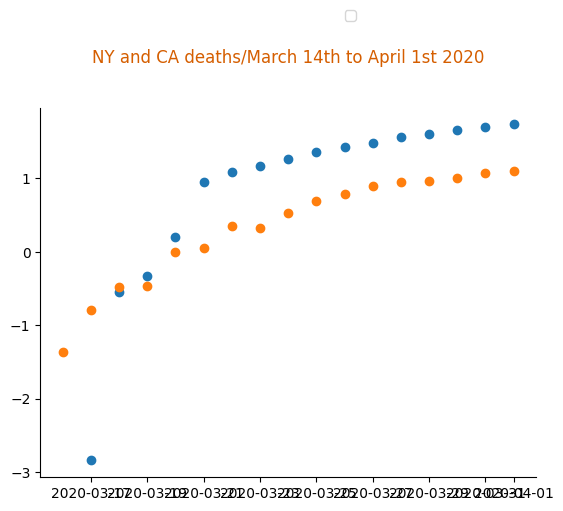

In [6]:

ny_state_data['day_index'] = (ny_state_data['date']-dt.datetime(2020, 1, 1)).dt.days

ca_state_data['day_index'] = (ca_state_data['date']-dt.datetime(2020, 1, 1)).dt.days

ny_state_data['deaths_avg'] = np.log(ny_state_data['deaths_avg'])
ny_state_data['log_deaths'] = np.log(ny_state_data['deaths_avg'])

ca_state_data['deaths_avg'] = np.log(ca_state_data['deaths_avg'])
ca_state_data['log_deaths'] = np.log(ca_state_data['deaths_avg'])

ny_state_data[['date', 'state', 'day_index', 'log_deaths']].head(3)

start_date = dt.datetime(2020, 3, 14)
end_date = dt.datetime(2020, 4, 1)

filtered_by_d = ny_state_data[(ny_state_data['date']>=start_date) & (ny_state_data['date']<=end_date)]

plt.scatter(filtered_by_d['date'], filtered_by_d['log_deaths'])

#regression of log deaths vs day index 

lr = linregress(filtered_by_d['day_index'], filtered_by_d['log_deaths'])

#the slope is the exponential growth rate r 

r = lr[0]

#R=e^(r*5)

print('R in', ny_state_data, 'from', start_date, 'to', 'end_date', 'was', np.exp(r*5))


filtered_by_e = ca_state_data[(ca_state_data['date']>=start_date) & (ca_state_data['date']<=end_date)]

plt.scatter(filtered_by_e['date'], filtered_by_e['log_deaths'])

#regression of log deaths vs day index 

lr = linregress(filtered_by_e['day_index'], filtered_by_e['log_deaths'])

#the slope is the exponential growth rate r 

r = lr[0]

#R=e^(r*5)

print('R in', ca_state_data, 'from', start_date, 'to', 'end_date', 'was', np.exp(r*5))

plt.title('NY and CA deaths/March 14th to April 1st 2020', y=1.1, color=colors[3]) 

plt.legend(bbox_to_anchor =(0.65, 1.25), loc='center right')

sns.despine()




/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountere

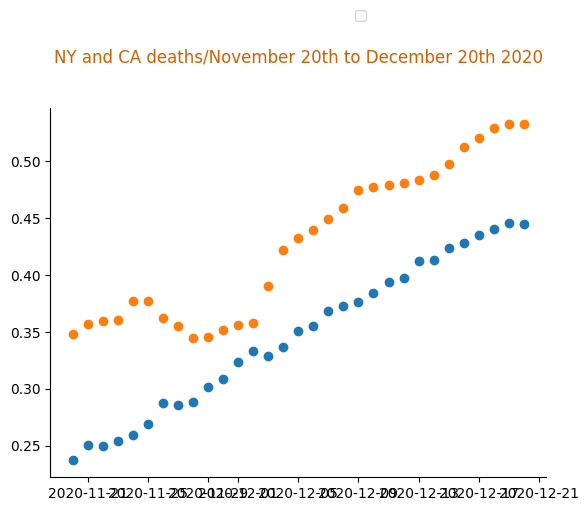

In [7]:
ny_state_data['day_index'] = (ny_state_data['date']-dt.datetime(2020, 1, 1)).dt.days

ca_state_data['day_index'] = (ca_state_data['date']-dt.datetime(2020, 1, 1)).dt.days

ny_state_data['deaths_avg'] = np.log(ny_state_data['deaths_avg'])
ny_state_data['log_deaths'] = np.log(ny_state_data['deaths_avg'])

ca_state_data['deaths_avg'] = np.log(ca_state_data['deaths_avg'])
ca_state_data['log_deaths'] = np.log(ca_state_data['deaths_avg'])

ny_state_data[['date', 'state', 'day_index', 'log_deaths']].head(3)

start_date = dt.datetime(2020, 11, 20)
end_date = dt.datetime(2020, 12, 20)

filtered_by_d = ny_state_data[(ny_state_data['date']>=start_date) & (ny_state_data['date']<=end_date)]

plt.scatter(filtered_by_d['date'], filtered_by_d['log_deaths'])

#regression of log deaths vs day index 

lr = linregress(filtered_by_d['day_index'], filtered_by_d['log_deaths'])

#the slope is the exponential growth rate r 

r = lr[0]

#R=e^(r*5)

print('R in', ny_state_data, 'from', start_date, 'to', 'end_date', 'was', np.exp(r*5))


filtered_by_e = ca_state_data[(ca_state_data['date']>=start_date) & (ca_state_data['date']<=end_date)]

plt.scatter(filtered_by_e['date'], filtered_by_e['log_deaths'])

#regression of log deaths vs day index 

lr = linregress(filtered_by_e['day_index'], filtered_by_e['log_deaths'])

#the slope is the exponential growth rate r 

r = lr[0]

#R=e^(r*5)

print('R in', ca_state_data, 'from', start_date, 'to', 'end_date', 'was', np.exp(r*5))

plt.title('NY and CA deaths/November 20th to December 20th 2020', y=1.1, color=colors[3]) 

plt.legend(bbox_to_anchor =(0.65, 1.25), loc='center right')

sns.despine()


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountere

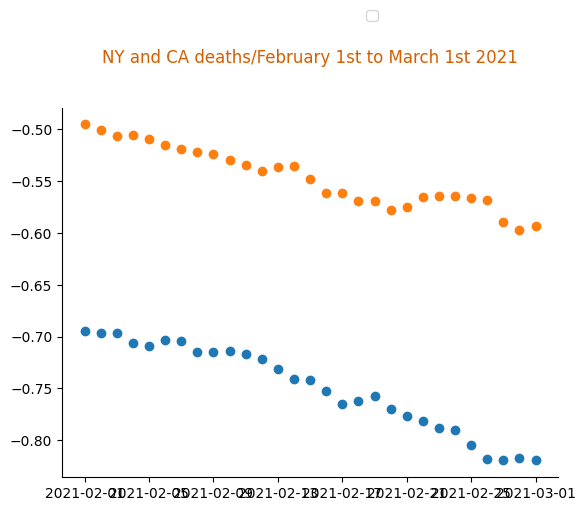

In [8]:
ny_state_data['day_index'] = (ny_state_data['date']-dt.datetime(2020, 1, 1)).dt.days

ca_state_data['day_index'] = (ca_state_data['date']-dt.datetime(2020, 1, 1)).dt.days

ny_state_data['deaths_avg'] = np.log(ny_state_data['deaths_avg'])
ny_state_data['log_deaths'] = np.log(ny_state_data['deaths_avg'])

ca_state_data['deaths_avg'] = np.log(ca_state_data['deaths_avg'])
ca_state_data['log_deaths'] = np.log(ca_state_data['deaths_avg'])

ny_state_data[['date', 'state', 'day_index', 'log_deaths']].head(3)

start_date = dt.datetime(2021, 2, 1)
end_date = dt.datetime(2021, 3, 1)

filtered_by_d = ny_state_data[(ny_state_data['date']>=start_date) & (ny_state_data['date']<=end_date)]

plt.scatter(filtered_by_d['date'], filtered_by_d['log_deaths'])

#regression of log deaths vs day index 

lr = linregress(filtered_by_d['day_index'], filtered_by_d['log_deaths'])

#the slope is the exponential growth rate r 

r = lr[0]

#R=e^(r*5)

print('R in', ny_state_data, 'from', start_date, 'to', 'end_date', 'was', np.exp(r*5))


filtered_by_e = ca_state_data[(ca_state_data['date']>=start_date) & (ca_state_data['date']<=end_date)]

plt.scatter(filtered_by_e['date'], filtered_by_e['log_deaths'])

#regression of log deaths vs day index 

lr = linregress(filtered_by_e['day_index'], filtered_by_e['log_deaths'])

#the slope is the exponential growth rate r 

r = lr[0]

#R=e^(r*5)

print('R in', ca_state_data, 'from', start_date, 'to', 'end_date', 'was', np.exp(r*5))

plt.title('NY and CA deaths/February 1st to March 1st 2021', y=1.1, color=colors[3]) 

plt.legend(bbox_to_anchor =(0.65, 1.25), loc='center right')

sns.despine()

## 1c) Telling the story of coronavirus in your county
Make a plot like the one at the top of these instruction document, but for your county instead of the whole country
* take a look at the county data by running `county_data.head(3)`
* Make a subset of that dataframe that is only data for California
* Make a subset of that dataframe that is only data for your county
* Make a figure with 3 subplots using this line of code: `fig, subs = plt.subplots(3, 1, figsize=(8, 4), dpi=150, sharex=True)`
* Plot cases_avg and deaths_avg (these are rolling averages) over time on two subplots of the figure
* Use “sharex=True” when making your subplots to make the x-axis the same between plots 
* Using the `county_vax` data from the LA Times:
    * Make a subset of that dataframe that is only data for your county
    * Plot fully_vaccinated_percent over time on a third subplot of your figure
    * Label your axes where appropriate


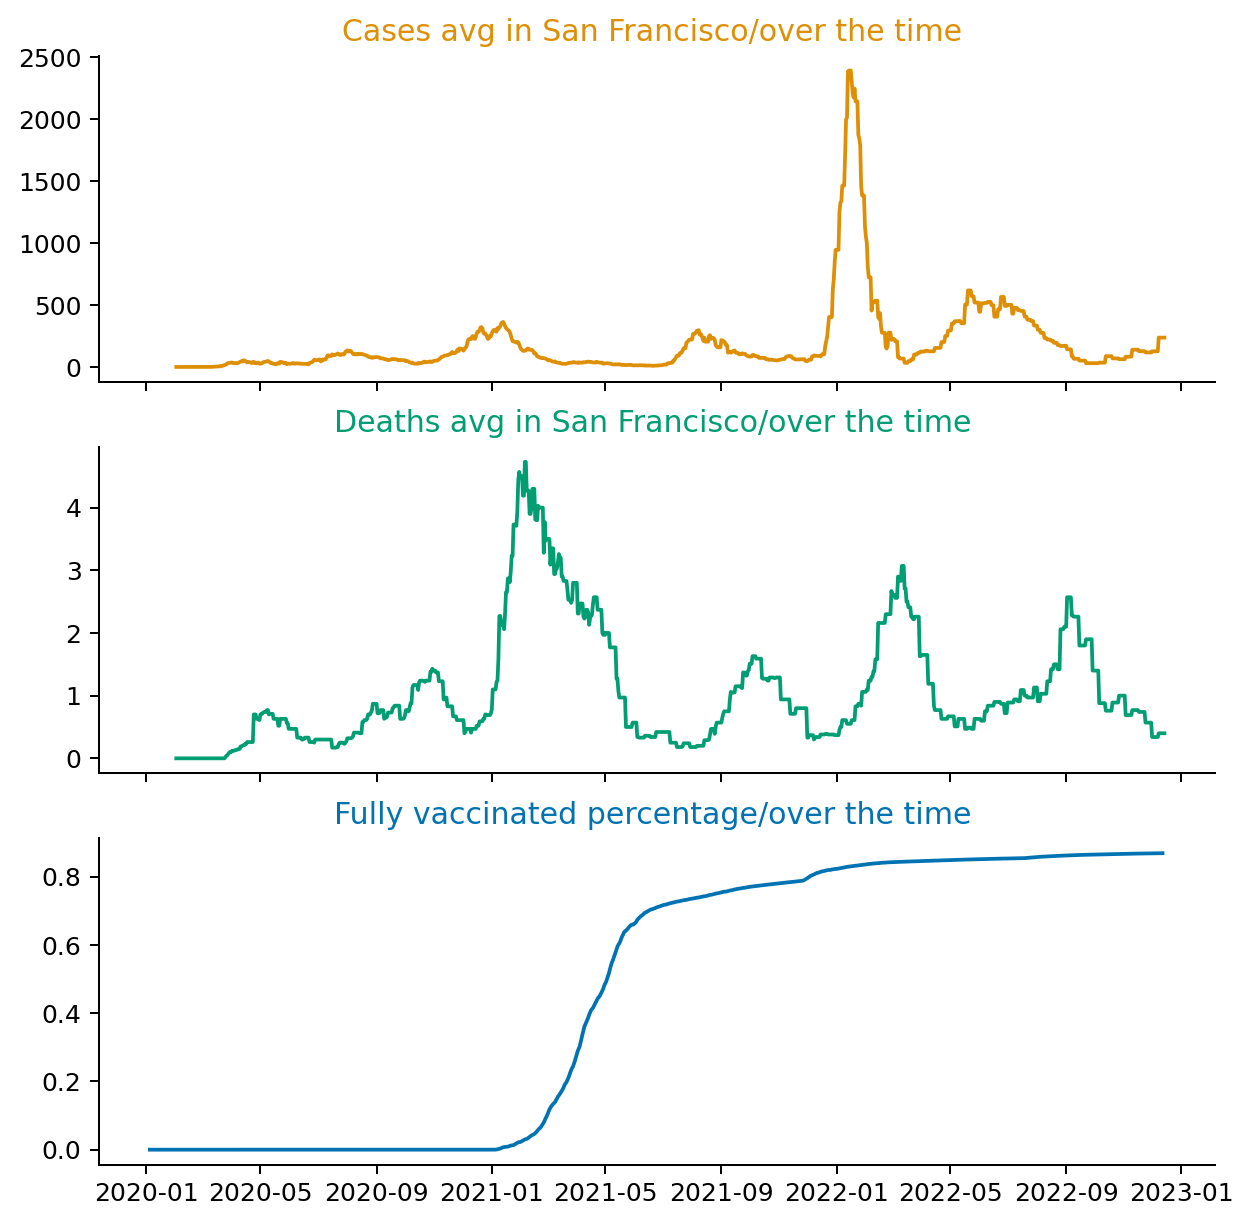

In [11]:
county_data.head(3)
county_data_ca = county_data[county_data['state']== 'California'] 
county_data_sf = county_data_ca[county_data_ca['county']=='San Francisco']
county_data_sf.head(3)

fig, subs = plt.subplots(3, 1, figsize=(8, 8), dpi=180, sharex=True)
subs[0].plot(county_data_sf['date'], county_data_sf['cases_avg'], label = "cases avg", color=colors[1])
subs[1].plot(county_data_sf['date'], county_data_sf['deaths_avg'], label = "deaths_avg", color=colors[2])


county_vax_sf = county_vax[county_vax['county']== 'San Francisco']
county_vax_sf.head(3)

subs[2].plot(county_vax_sf['date'],county_vax_sf['fully_vaccinated_percent'], label ='fully vaccinated percent', color=colors[0])

subs[0].set_title('Cases avg in San Francisco/over the time ', y=1, color=colors[1]) 
subs[1].set_title('Deaths avg in San Francisco/over the time ', y=1, color=colors[2]) 
subs[2].set_title('Fully vaccinated percentage/over the time ', y=1, color=colors[0]) 


sns.despine()

## 2) Part 2: Exploring the data more!
You may choose what to explore about the data in part 2. At some point during this process, make sure you are **asking a question** and trying to answer it with the data. Can you find out something interesting? Here are some suggestions:
#### Relatively easy ideas:
* Make a similar county plot as you made in 1C, but include another 2-3 counties near your county so you can compare and contrast the dynamics of cases, deaths, and vaccinations. Since you are comparing counties with different population sizes on the same plot, you should use cases_avg_per_100k and deaths_avg_per_100k instead of just cases_avg and deaths_avg, in order to control for those population size differences. 
* Measure R at a few time intervals for your county. Compare and contrast your results with your results for New York and California above. Make sure to check that your data for the time intervals isn’t too noisy – it’s possible for little fluctuations to affect the slope of log_deaths vs. time if the counts are low.
* Do some research to add some human aspect to the story of Covid-19 in your county, and annotate your plot (either in pyplot or on another image editing program). One example of an annotation you could add is when lockdowns or mask mandates began or ended, but you could also mark more specific events, like specific people who are important to the community or to you getting sick or vaccinated. 
#### More difficult ideas:
* Look at the the relationship between politics (voting results from the 2020 election), vaccination rates, and covid deaths since the start of the summer. You can ask this question specifically at the county level in California, using the `county_vax` dataframe, the `county_data` dataframe, and the county voting data available here: `'https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv'`. This will likely require you to:
    * Filter the `county_vax` dataframe to just get data from a single date (one row per county)
    * Filter the `county_data` dataframe to get dates starting around June 2021, and then use `.groupby` and `.sum` to get the total number of deaths and cases per 100k in that time frame for each county
    * Manipulate the FIPS or county_name columns in each of the 3 datasets to be able to merge them
* Pick a country whose data you would like to explore, or ask a question about why some countries have done better than others (see the Our World in Data dataset below). Keep in mind that different countries have different standards for reporting cases and deaths, so the data quality may be variable.
* Look into the variant data from the LA Times dataset and see if you can measure differences in R between variants in certain time intervals when multiple variants were present in California
* Look into the prison data in either the LA Times or NY Times datasets - how did Covid-19 affect prison populations as compared to the general public?
* Look at the mask use survey data from the NY Times from the summer of 2020. Does these mask use survey results correlate with voting patterns in US counties? With vaccination rates? With Covid cases or deaths? Similar to the question above, this will likely require some data manipulation and merging

* Or you can come up with your own idea!

Dataset links:

* [LA Times covid data](https://github.com/datadesk/california-coronavirus-data)
* [New York Times covid data](https://github.com/nytimes/covid-19-data)
* [Our world in data (covid data)](https://github.com/owid/covid-19-data)
* [Our world in data (general worldwide datasets)](https://github.com/owid/owid-datasets/tree/master/datasets)
* [Datasets from dataopian](https://github.com/datasets)

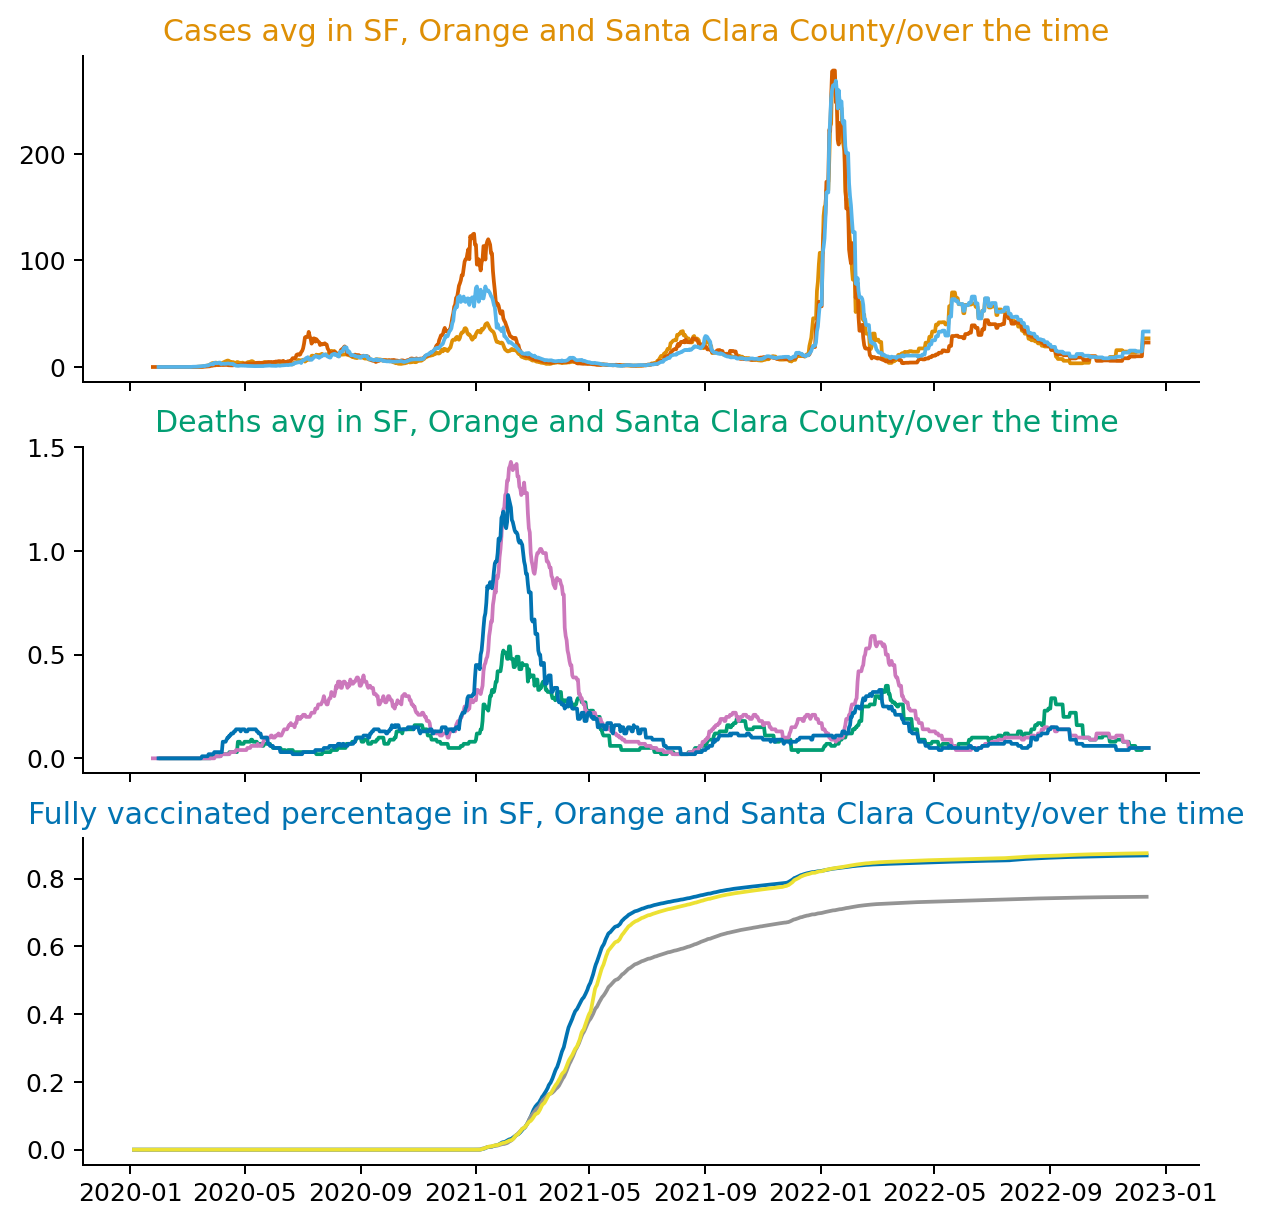

In [12]:
county_data.head(3)
county_data_ca = county_data[county_data['state']== 'California'] 
county_data_sf = county_data_ca[county_data_ca['county']=='San Francisco']

county_data_orange = county_data_ca[county_data_ca['county']=='Orange']

county_data_santaclara = county_data_ca[county_data_ca['county']=='Santa Clara']

fig, subs = plt.subplots(3, 1, figsize=(8, 8), dpi=180, sharex=True)
subs[0].plot(county_data_sf['date'], county_data_sf['cases_avg_per_100k'], label = "cases_avg_per_100k", color=colors[1])
subs[1].plot(county_data_sf['date'], county_data_sf['deaths_avg_per_100k'], label = "deaths_avg_per_100k", color=colors[2])
subs[0].plot(county_data_orange['date'], county_data_orange['cases_avg_per_100k'], label = "cases_avg_per_100k", color=colors[3])
subs[1].plot(county_data_orange['date'], county_data_orange['deaths_avg_per_100k'], label = "deaths_avg_per_100k", color=colors[4])
subs[0].plot(county_data_santaclara['date'], county_data_santaclara['cases_avg_per_100k'], label = "cases_avg_per_100k", color=colors[9])
subs[1].plot(county_data_santaclara['date'], county_data_santaclara['deaths_avg_per_100k'], label = "deaths_avg_per_100k", color=colors[0])

county_vax_sf = county_vax[county_vax['county']== 'San Francisco']
county_vax_orange = county_vax[county_vax['county']== 'Orange']
county_vax_santaclara = county_vax[county_vax['county']== 'Santa Clara']

county_vax_sf.head(3)

subs[2].plot(county_vax_sf['date'],county_vax_sf['fully_vaccinated_percent'], label ='fully vaccinated percent', color=colors[0])
subs[2].plot(county_vax_orange['date'],county_vax_orange['fully_vaccinated_percent'], label ='fully vaccinated percent', color=colors[7])
subs[2].plot(county_vax_santaclara['date'],county_vax_santaclara['fully_vaccinated_percent'], label ='fully vaccinated percent', color=colors[8])

subs[0].set_title('Cases avg in SF, Orange and Santa Clara County/over the time ', y=1, color=colors[1]) 
subs[1].set_title('Deaths avg in SF, Orange and Santa Clara County/over the time ', y=1, color=colors[2]) 
subs[2].set_title('Fully vaccinated percentage in SF, Orange and Santa Clara County/over the time ', y=1, color=colors[0]) 


sns.despine()

In [5]:
county_data.head(30)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,USA-53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,USA-17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0
5,2020-01-25,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
6,2020-01-25,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.0,0.0
7,2020-01-25,USA-06059,Orange,California,1,0.14,0.00,0,0.0,0.0
8,2020-01-26,USA-53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
9,2020-01-26,USA-17031,Cook,Illinois,0,0.14,0.00,0,0.0,0.0


In [11]:

county_data_ca = county_data[county_data['state']== 'California'] 
county_data_ca.head(30)

,date,geoid,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
7,2020-01-25,USA-06059,Orange,California,1,0.14,0.00,0,0.0,0.0
10,2020-01-26,USA-06059,Orange,California,0,0.14,0.00,0,0.0,0.0
11,2020-01-26,USA-06037,Los Angeles,California,1,0.14,0.00,0,0.0,0.0
15,2020-01-27,USA-06059,Orange,California,0,0.14,0.00,0,0.0,0.0
16,2020-01-27,USA-06037,Los Angeles,California,0,0.14,0.00,0,0.0,0.0
20,2020-01-28,USA-06059,Orange,California,0,0.14,0.00,0,0.0,0.0
21,2020-01-28,USA-06037,Los Angeles,California,0,0.14,0.00,0,0.0,0.0
25,2020-01-29,USA-06059,Orange,California,0,0.14,0.00,0,0.0,0.0
26,2020-01-29,USA-06037,Los Angeles,California,0,0.14,0.00,0,0.0,0.0
30,2020-01-30,USA-06059,Orange,California,0,0.14,0.00,0,0.0,0.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=92164aed-393a-4c70-8326-e106f79fe1e3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>